In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

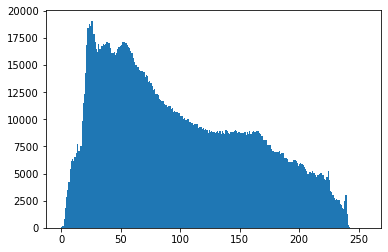

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('bg1.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()


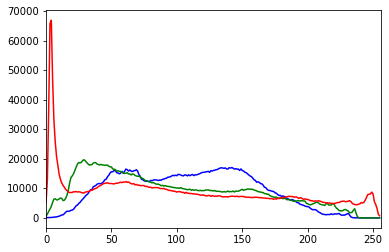

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('bg1.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


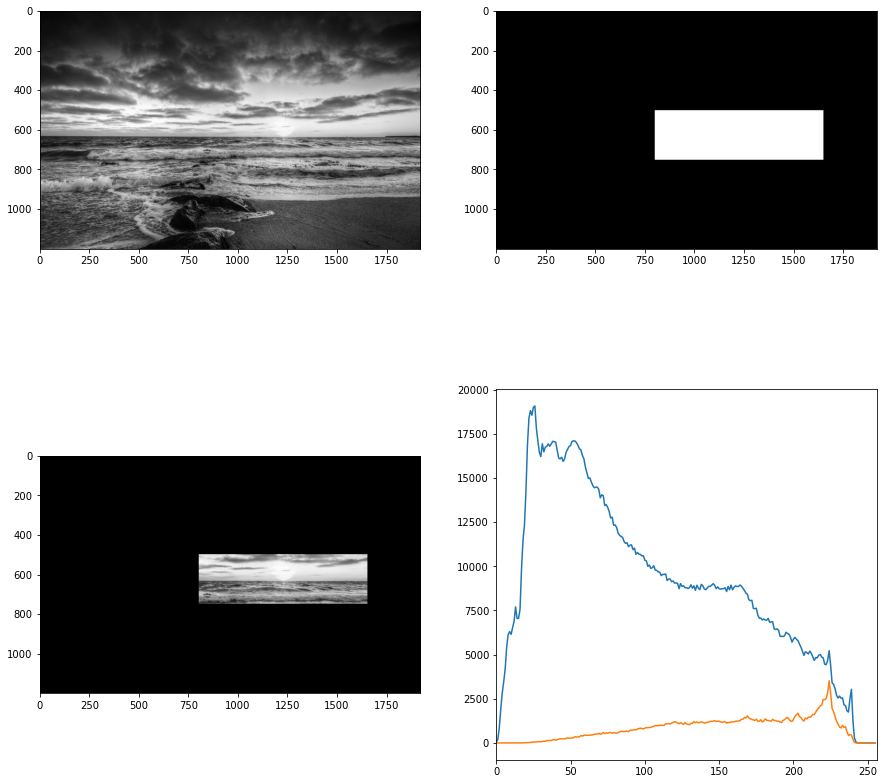

In [16]:
img = cv2.imread('bg1.jpg',0)

mask = np.zeros(img.shape[:2], np.uint8)
mask[500:750, 800:1650] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.figure(figsize=(15,15), facecolor='white')
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()


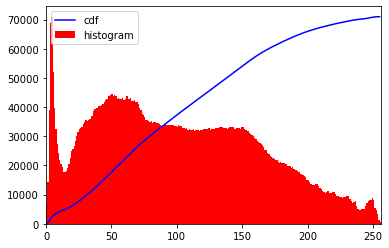

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('bg1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


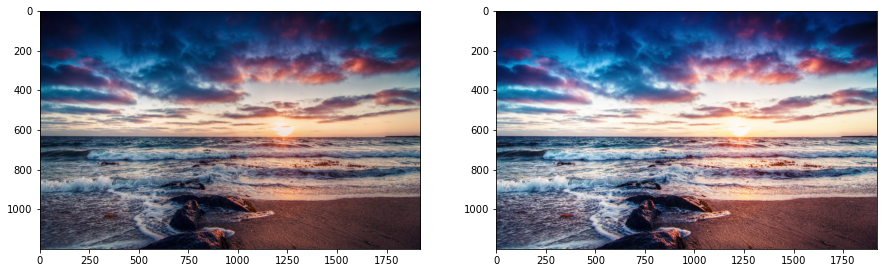

In [34]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]

plt.figure(figsize=(15,8), facecolor='white')
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(img2)
plt.show()

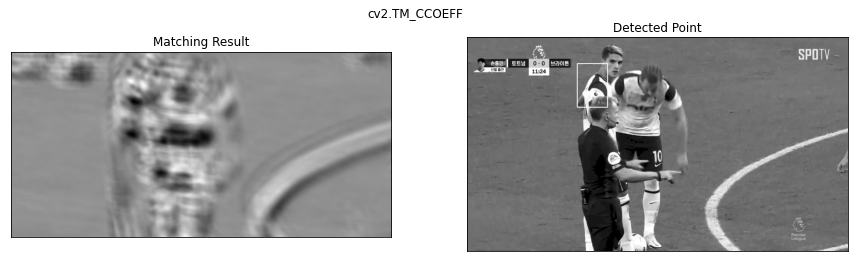

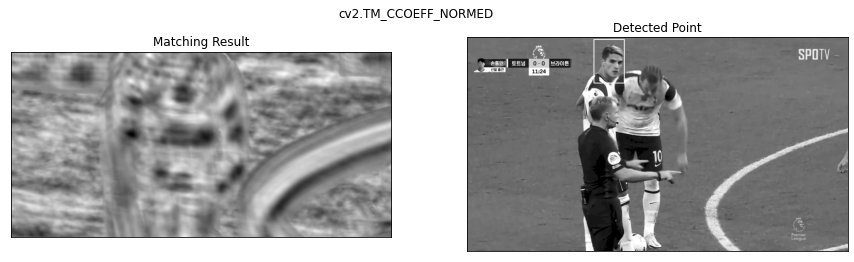

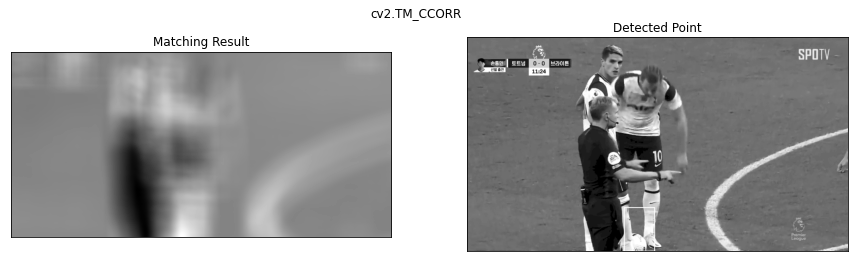

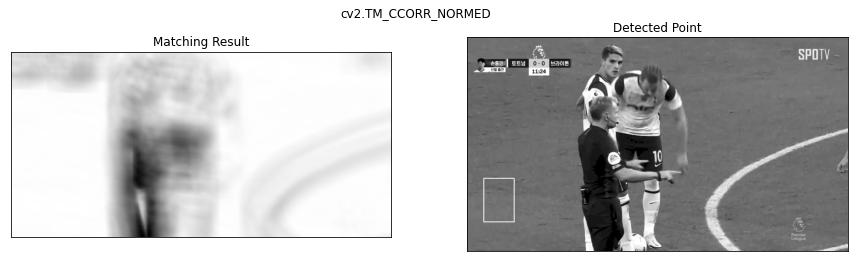

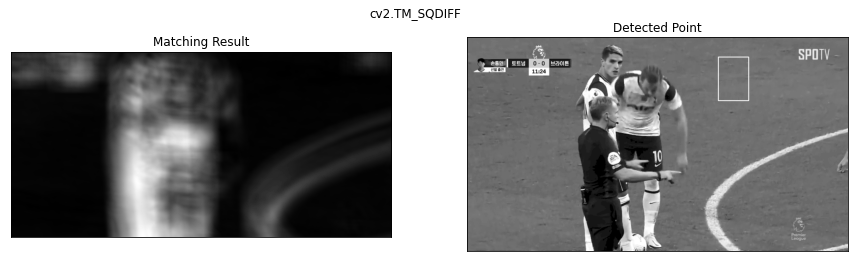

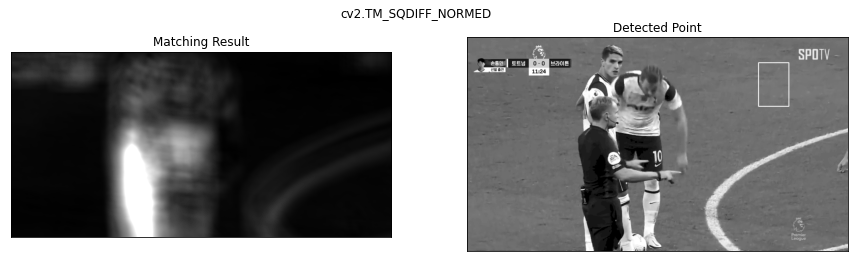

In [39]:
img = cv2.imread('tm1.png',0) #mario
img2 = img.copy()
template = cv2.imread('tm0.png',0) #coin
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(15,4), facecolor='white')
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()


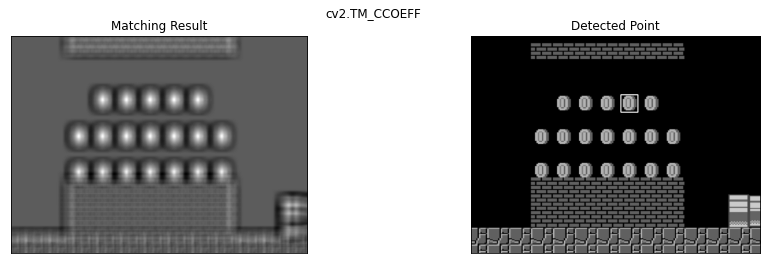

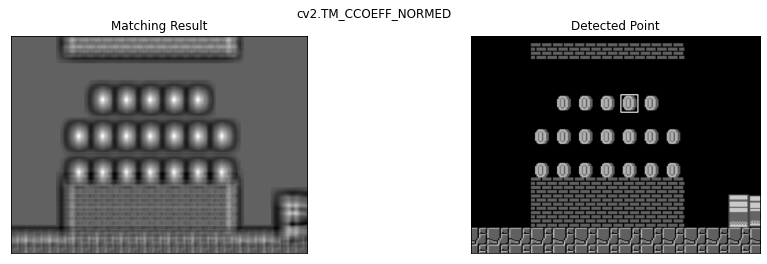

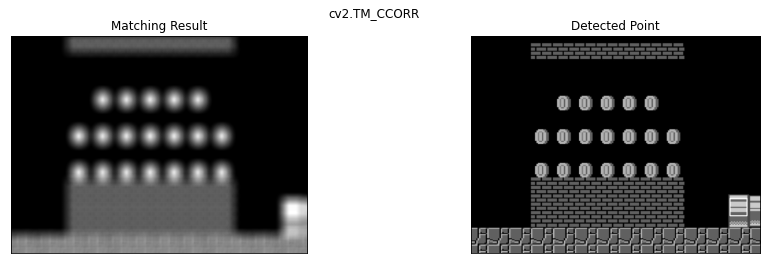

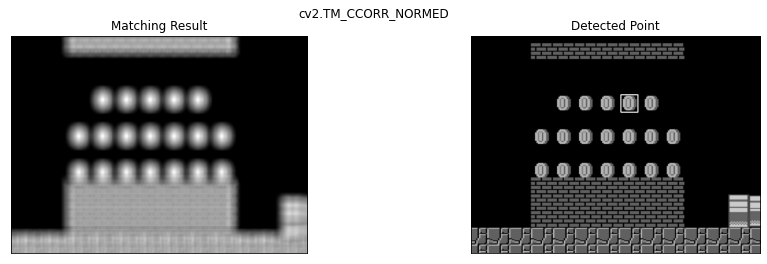

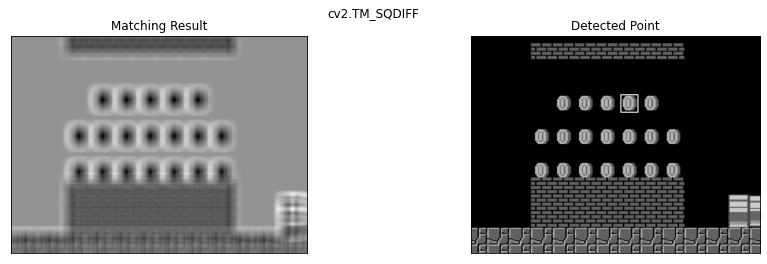

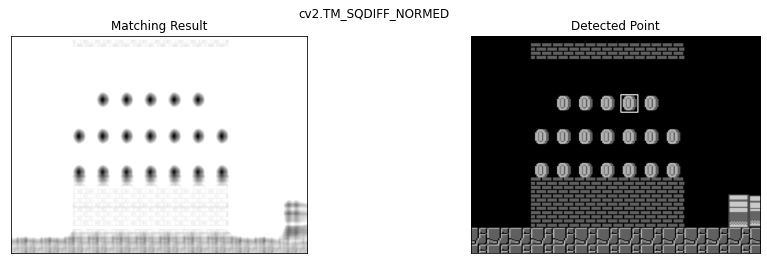

In [40]:
img = cv2.imread('tm2.png',0) #mario
img2 = img.copy()
template = cv2.imread('tm3.png',0) #coin
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(15,4), facecolor='white')
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1c254d508b0>)

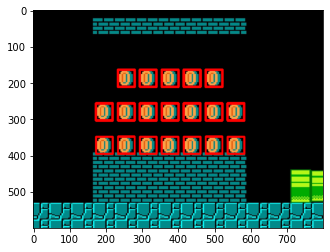

In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv2.imread('tm2.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('tm3.png',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,4), facecolor='white')
plt.subplot(121),plt.imshow(img_rgb,cmap = 'gray')